# Deep Learning on Neanderthal Genes
* https://towardsdatascience.com/deep-learning-on-neanderthal-genes-ad1478cf37e7
* https://github.com/NikolayOskolkov/DeepLearningNeanderthalIntrogression/blob/master/DeepLearningNeanderthalIntrogression.ipynb

/home/dave/anaconda3/envs/capstone/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

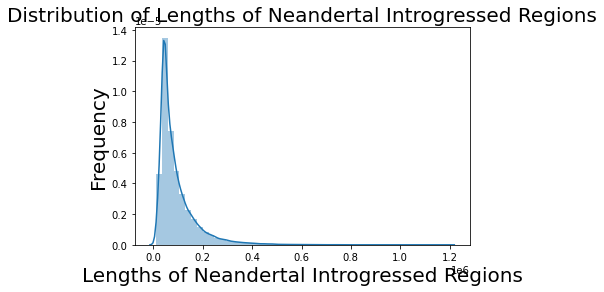

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
intr_coords = pd.read_csv('../data/bioinformatics/neandertal/Akey_intr_coords.bed', header = None, sep = "\t")
intr_lengths = intr_coords.iloc[:, 2]-intr_coords.iloc[:, 1]
sns.distplot(intr_lengths)
plt.title("Distribution of Lengths of Neandertal Introgressed Regions", fontsize = 20)
plt.xlabel("Lengths of Neandertal Introgressed Regions", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)

In [4]:
import subprocess
a = 0
with open('../data/bioinformatics/neandertal/hg19_intr_regions.fa', 'a') as fp:
    for i in range(intr_coords.shape[0]):
        coord = str(str(intr_coords.iloc[i, 0]) + ':' 
                    + str(intr_coords.iloc[i, 1]) + '-' + str(intr_coords.iloc[i, 2]))
        subprocess.run(['samtools', 'faidx', '../data/bioinformatics/neandertal/hg19.fa.gz', str(coord)], stdout = fp)
        a = a + 1
        if a%10000 == 0:
            print('Finished ' + str(a) + ' Neanderthal introgressed haplotypes')

Finished 10000 Neanderthal introgressed haplotypes
Finished 20000 Neanderthal introgressed haplotypes
Finished 30000 Neanderthal introgressed haplotypes
Finished 40000 Neanderthal introgressed haplotypes
Finished 50000 Neanderthal introgressed haplotypes
Finished 60000 Neanderthal introgressed haplotypes
Finished 70000 Neanderthal introgressed haplotypes
Finished 80000 Neanderthal introgressed haplotypes


In [5]:
import numpy as np
chr_sizes = pd.read_csv("../data/bioinformatics/neandertal/hg19.fa.gz.fai", header = None, sep = "\t")
chr_sizes = chr_sizes.drop([2, 3, 4], axis = 1)
chr_list = []; start_list = []; end_list = []
intr_lengths = list(intr_coords.iloc[:, 2] - intr_coords.iloc[:, 1])
a = 0
for i in range(intr_coords.shape[0]):
    chr_df = intr_coords[intr_coords[0].isin([intr_coords.iloc[i,0]])]
    overlap = True
    while overlap == True:
        reg_start = np.random.randint(1, int(chr_sizes[chr_sizes[0] == 
                                                       intr_coords.iloc[i,0]].iloc[:,1]))
        reg_end = reg_start + intr_lengths[i]
        for j in range(chr_df.shape[0]):
            b1 = chr_df.iloc[j,1]
            b2 = chr_df.iloc[j,2]
            if (reg_start > b1 and reg_start < b2) or (reg_end > b1 and reg_end < b2) or \
            (b1 > reg_start and b1 < reg_end) or (b2 > reg_start and b2 < reg_end):
                overlap = True
                break
            else:
                overlap = False
    chr_list.append(intr_coords.iloc[i,0])
    start_list.append(reg_start)
    end_list.append(reg_end)
    a = a + 1
    if a%10000 == 0:
        print('Finished ' + str(a) + ' Neanderthal introgressed haplotypes')
depl_coords = pd.DataFrame({'0': chr_list, '1': start_list, '2': end_list})
depl_coords.to_csv("../data/bioinformatics/neandertal/Akey_depl_coords.bed", index = False, header = False, sep = "\t")

Finished 10000 Neanderthal introgressed haplotypes
Finished 20000 Neanderthal introgressed haplotypes
Finished 30000 Neanderthal introgressed haplotypes
Finished 40000 Neanderthal introgressed haplotypes
Finished 50000 Neanderthal introgressed haplotypes
Finished 60000 Neanderthal introgressed haplotypes
Finished 70000 Neanderthal introgressed haplotypes
Finished 80000 Neanderthal introgressed haplotypes


In [8]:
import pandas as pd
import subprocess

#depl_coords = pd.read_csv("../data/bioinformatics/neandertal/Akey_depl_coords.bed", index = False, header = False, sep = "\t")
depl_coords = pd.read_csv("../data/bioinformatics/neandertal/Akey_depl_coords.bed", sep = "\t")

a = 0
with open('../data/bioinformatics/neandertal/hg19_depl_regions.fa', 'a') as fp:
    for i in range(depl_coords.shape[0]):
        coord = str(str(depl_coords.iloc[i, 0]) + ':' 
                    + str(depl_coords.iloc[i, 1]) + '-' + str(depl_coords.iloc[i, 2]))
        subprocess.run(['samtools', 'faidx', '../data/bioinformatics/neandertal/hg19.fa.gz', str(coord)], stdout = fp)
        a = a + 1
        if a%10000 == 0:
            print('Finished ' + str(a) + ' Neanderthal depleted haplotypes')

[faidx] Truncated sequence: chr1:249240055-249282006
[faidx] Truncated sequence: chr1:249228872-249347411
[faidx] Truncated sequence: chr1:249243540-249469745
[faidx] Truncated sequence: chr1:249075931-249258990
[faidx] Truncated sequence: chr1:249222975-249308027
[faidx] Truncated sequence: chr1:249239450-249415905
[faidx] Truncated sequence: chr1:249206116-249324730
[faidx] Truncated sequence: chr1:249188435-249260646
[faidx] Truncated sequence: chr1:249136605-249382384
[faidx] Truncated sequence: chr10:135472603-135606121
[faidx] Truncated sequence: chr10:135519659-135695688
[faidx] Truncated sequence: chr10:135516117-135585980
[faidx] Truncated sequence: chr10:135513799-135747990
[faidx] Truncated sequence: chr10:135519706-135645245
[faidx] Truncated sequence: chr10:135528220-135539791


Finished 10000 Neanderthal depleted haplotypes


[faidx] Truncated sequence: chr10:135260332-135582287
[faidx] Truncated sequence: chr10:135463271-135582479
[faidx] Truncated sequence: chr11:134997847-135081353
[faidx] Truncated sequence: chr11:134989766-135044978
[faidx] Truncated sequence: chr11:134888940-135126338
[faidx] Truncated sequence: chr11:134697582-135078134
[faidx] Truncated sequence: chr11:134948413-135140658
[faidx] Truncated sequence: chr11:134969974-135026987
[faidx] Truncated sequence: chr12:133802649-133898697
[faidx] Truncated sequence: chr12:133823894-133870724
[faidx] Truncated sequence: chr12:133806093-133925305
[faidx] Truncated sequence: chr12:133775127-133896844
[faidx] Truncated sequence: chr12:133819106-133853905


Finished 20000 Neanderthal depleted haplotypes


[faidx] Truncated sequence: chr12:133807231-133859537
[faidx] Truncated sequence: chr12:133830011-134119577
[faidx] Truncated sequence: chr12:133823099-134217021
[faidx] Truncated sequence: chr12:133830652-134028947
[faidx] Truncated sequence: chr12:133805076-133952243
[faidx] Truncated sequence: chr12:133846281-133877430
[faidx] Truncated sequence: chr12:133846351-133907680
[faidx] Truncated sequence: chr12:133844936-133896812
[faidx] Truncated sequence: chr12:133813586-133865164
[faidx] Truncated sequence: chr13:115140164-115474499
[faidx] Truncated sequence: chr14:107252213-107445295
[faidx] Truncated sequence: chr14:107235785-107494924
[faidx] Truncated sequence: chr14:107330224-107529599
[faidx] Truncated sequence: chr14:107204352-107693051
[faidx] Truncated sequence: chr14:107166015-107659240
[faidx] Truncated sequence: chr14:107096674-107360650
[faidx] Truncated sequence: chr14:107308160-107503895


Finished 30000 Neanderthal depleted haplotypes


[faidx] Truncated sequence: chr15:102459334-102557088
[faidx] Truncated sequence: chr15:102421307-102600317
[faidx] Truncated sequence: chr15:102525497-102651338
[faidx] Truncated sequence: chr15:102525109-102569145
[faidx] Truncated sequence: chr16:90278876-90465060
[faidx] Truncated sequence: chr16:90326805-90442504
[faidx] Truncated sequence: chr16:90322779-90424461
[faidx] Truncated sequence: chr16:90206211-90546120
[faidx] Truncated sequence: chr16:90248483-90365307
[faidx] Truncated sequence: chr17:81187323-81235034
[faidx] Truncated sequence: chr18:77796207-78171138
[faidx] Truncated sequence: chr18:78076044-78184854
[faidx] Truncated sequence: chr18:78042996-78507338
[faidx] Truncated sequence: chr18:78009432-78528403
[faidx] Truncated sequence: chr18:77899829-78520248
[faidx] Truncated sequence: chr18:77980976-78083516
[faidx] Truncated sequence: chr18:78068811-78132246
[faidx] Truncated sequence: chr2:243154594-243269993
[faidx] Truncated sequence: chr2:243154537-243320899
[f

Finished 40000 Neanderthal depleted haplotypes


[faidx] Truncated sequence: chr2:243042199-243215358
[faidx] Truncated sequence: chr2:242987696-243705129
[faidx] Truncated sequence: chr2:243151418-243220245
[faidx] Truncated sequence: chr2:243198757-243493162
[faidx] Truncated sequence: chr2:243074457-243381283
[faidx] Truncated sequence: chr2:243195913-243344238
[faidx] Truncated sequence: chr2:243187480-243314131
[faidx] Truncated sequence: chr20:63020899-63059508
[faidx] Truncated sequence: chr20:62995768-63040591
[faidx] Truncated sequence: chr20:63001812-63057275
[faidx] Truncated sequence: chr20:62787488-63050587
[faidx] Truncated sequence: chr20:63017343-63202995
[faidx] Truncated sequence: chr20:62895125-63028211
[faidx] Truncated sequence: chr21:48086877-48224608
[faidx] Truncated sequence: chr21:48123648-48177319
[faidx] Truncated sequence: chr3:197971806-198050138
[faidx] Truncated sequence: chr3:197909535-198035579
[faidx] Truncated sequence: chr3:198016027-198188211


Finished 50000 Neanderthal depleted haplotypes


[faidx] Truncated sequence: chr3:197887085-198061593
[faidx] Truncated sequence: chr3:197969495-198057784
[faidx] Truncated sequence: chr3:197931112-198082008
[faidx] Truncated sequence: chr3:197984425-198082290
[faidx] Truncated sequence: chr3:197963906-198043355
[faidx] Truncated sequence: chr3:198015127-198275191
[faidx] Truncated sequence: chr4:190933650-191170136
[faidx] Truncated sequence: chr4:191126322-191242470
[faidx] Truncated sequence: chr4:191074983-191456476
[faidx] Truncated sequence: chr4:191100766-191428739
[faidx] Truncated sequence: chr4:190988720-191248172
[faidx] Truncated sequence: chr4:191043972-191370059
[faidx] Truncated sequence: chr4:191118312-191244321
[faidx] Truncated sequence: chr4:191135390-191176655


Finished 60000 Neanderthal depleted haplotypes


[faidx] Truncated sequence: chr5:180866819-180919202
[faidx] Truncated sequence: chr5:180810773-181131849
[faidx] Truncated sequence: chr5:180899643-180956766
[faidx] Truncated sequence: chr5:180895363-180981719
[faidx] Truncated sequence: chr5:180887863-180929236
[faidx] Truncated sequence: chr5:180622350-181078274
[faidx] Truncated sequence: chr6:171040380-171346890
[faidx] Truncated sequence: chr6:171079389-171136016
[faidx] Truncated sequence: chr6:171098615-171143556
[faidx] Truncated sequence: chr6:170910412-171163236
[faidx] Truncated sequence: chr6:170827297-171412477
[faidx] Truncated sequence: chr6:171069143-171257506
[faidx] Truncated sequence: chr6:171021248-171145428
[faidx] Truncated sequence: chr6:171087619-171135867
[faidx] Truncated sequence: chr6:171033648-171130462
[faidx] Truncated sequence: chr6:171035119-171232476
[faidx] Truncated sequence: chr6:171077889-171241408
[faidx] Truncated sequence: chr6:170930138-171379734


Finished 70000 Neanderthal depleted haplotypes


[faidx] Truncated sequence: chr6:170990810-171245435
[faidx] Truncated sequence: chr7:159132874-159186456
[faidx] Truncated sequence: chr7:159065524-159145460
[faidx] Truncated sequence: chr7:159104097-159158194
[faidx] Truncated sequence: chr7:159076330-159164476
[faidx] Truncated sequence: chr8:146300054-146402636
[faidx] Truncated sequence: chr8:146356856-146458675


Finished 80000 Neanderthal depleted haplotypes


[faidx] Truncated sequence: chr9:141197070-141334349
[faidx] Truncated sequence: chr9:141190717-141352290
[faidx] Truncated sequence: chr9:141203662-141375846
[faidx] Truncated sequence: chr9:141186680-141237522
[faidx] Truncated sequence: chr9:141095669-141413988
[faidx] Truncated sequence: chr9:141194951-141509896
[faidx] Truncated sequence: chr9:141095769-141238600
[faidx] Truncated sequence: chr9:141188192-141275827
[faidx] Truncated sequence: chr9:141187391-141260951


In [9]:
from Bio import SeqIO
intr_file = '../data/bioinformatics/neandertal/hg19_intr_regions.fa'
depl_file = '../data/bioinformatics/neandertal/hg19_depl_regions.fa'
a = 0; i = 0
with open('../data/bioinformatics/neandertal/hg19_intr_clean.fa-2', 'a') as intr_out,open('../data/bioinformatics/neandertal/hg19_depl_clean.fa-2', 'a') as depl_out:
    for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
        upper_intr = intr.seq.upper()
        upper_depl = depl.seq.upper()
        a = a + 1
        if a%10000 == 0:
            print('Finished ' + str(a) + ' entries')
        if 'N' not in str(upper_intr) and 'N' not in str(upper_depl):
            intr.seq = upper_intr
            SeqIO.write(intr, intr_out, 'fasta')
            depl.seq = upper_depl
            SeqIO.write(depl, depl_out, 'fasta')
            i = i + 1
        else:
            continue
print('We have processed ' + str(a) + ' entries and written ' + str(i) 
      + ' entries to two fasta-files')

Finished 10000 entries
Finished 20000 entries
Finished 30000 entries
Finished 40000 entries
Finished 50000 entries
Finished 60000 entries
Finished 70000 entries
Finished 80000 entries
Finished 90000 entries
Finished 100000 entries
Finished 110000 entries
Finished 120000 entries
Finished 130000 entries
Finished 140000 entries
Finished 150000 entries
Finished 160000 entries
We have processed 167202 entries and written 147054 entries to two fasta-files


Now the data is prepared for inputting into NLP analysis. Let us proceed with the simple **Bag Of Words model**, i.e. looking at the difference in **frequency** of k-mers between Neanderthal introgressed vs. depleted sequences.

## Sentiment Analysis: Introgressed vs. Depleted
We are going to start with formatting the sequences from the two fasta-files as texts with space-delimited k-mers as words. Because of memory limitations of my laptop I read only first 10,000 nucleotides from each sequence, then I used the function **getKmers** that splits each sequence into k-mers and merged the k-mers in space-delimited manner, so at the end, I had a list of sentences, each of them represents a list of words / k-mers.

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
intr_file = '../data/bioinformatics/neandertal/hg19_intr_clean.fa-2';
depl_file = '../data/bioinformatics/neandertal/hg19_depl_clean.fa-2'; e = 0
intr_seqs = []; depl_seqs = []
#cutoff = 10000
cutoff = 5000
entry_limit = 50000
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    my_intr_seq = str(intr.seq)[0:cutoff]
    my_depl_seq = str(depl.seq)[0:cutoff]
    intr_seqs.append(my_intr_seq)
    depl_seqs.append(my_depl_seq)
    e = e + 1
    if e%20000 == 0:
        print('Finished ' + str(e) + ' entries')
    if e >= entry_limit:
        break
        
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

kmer = 5
intr_texts = [' '.join(getKmers(i, kmer)) for i in intr_seqs]
depl_texts = [' '.join(getKmers(i, kmer)) for i in depl_seqs]

Finished 20000 entries
Finished 40000 entries


Now we can easily visualize k-mer frequencies in Neanderthal introgressed and depleted sequences using the **Counter** class in Python for efficient word counting.

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

plt.subplot(2, 1, 1)
intr_sentences = [item.split(' ') for item in intr_texts]
D = dict(Counter([item for sublist in intr_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Introgressed Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20); plt.xticks(rotation = 90)
plt.xticks(range(len(D)), list(D.keys()), fontsize = 20)

plt.subplot(2, 1, 2)
depl_sentences = [item.split(' ') for item in depl_texts]
D = dict(Counter([item for sublist in depl_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Depleted Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20); plt.xticks(rotation = 90)
plt.xticks(range(len(D)), list(D.keys()), fontsize = 20)